# Part I - ProsperLoans data  Exploration
## by Mayo Takémsi Norris KADANGA

## Introduction

Ce présent document porte sur l'analyse exploratoire de la base **ProsperLoans**, une base de 113937 lignes ou observations et 81 colonnes. Elle nous renseigne sur les demandeurs de prêts aux Etats-Unis ainsi que leurs différentes caractéristiques. 
Après avoir séletionner des variables qui nous intéressent pour nos analyses, nous procédons à un nettoyage assez complet de la base. Nous poursuivrons avec de l'analyse exploratoire en commençant par l'analyse univariée, suivi de celle bivariée et pour terminer avec l'analyse multivariée.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Importation de la base 
df_loans=pd.read_csv('prosperLoanData.csv')
# Les 11 premières lignes de la base
df_loans.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [3]:
# Taille de la base 
print('Le nombre de lignes de la base est:', df_loans.shape[0])
print('Le nombre de colonnes de la base est:', df_loans.shape[1])

Le nombre de lignes de la base est: 113937
Le nombre de colonnes de la base est: 81


In [4]:
# Structure de la base 
df_loans.info()
#df_loans.Occupation.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

### What is the structure of your dataset?

>  La base de données comporte 113937 lignes et 81 colonnes. On observe quatre type de variables: chaînes de caractères, entiers, flottants et booléens. Nous remarquons également qu'il y a beacoup de données manquantes dans la base. 
Dans la suite, nous n'allons considérer que **18** caractéristiques ou variables pour nos analalyses. Il s'agira des variables : `'ListingCreationDate',
               'Term', 
               'LoanStatus',
               'BorrowerAPR',
               'BorrowerRate',
               'ProsperRating (Alpha)',
                'ProsperScore',
               'EmploymentStatus',
                'Occupation', 
                'ListingCategory (numeric)', 
               'MonthlyLoanPayment', 
               'IsBorrowerHomeowner',
               'IncomeRange',
               'TotalProsperLoans', 
               'Recommendations', 
               'Investors', 
               'LoanOriginalAmount', 
               LenderYield.`

### What is/are the main feature(s) of interest in your dataset?

> Les principales variables d'intérêt sont: `LoanStatus, BorrowerAPR`.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Les variables indépendantes seront donc: `ListingCreationDate, MonthlyLoanPayment, Term, ProsperRating (Alpha), ProsperScore, EmploymentStatus, Occupation IsBorrowerHomeowner,IncomeRange,Recommendations, Investors.`

### *Note:* 
Avant de commencer toutes visualistions, il faudra s'assurer que la base est propre. Nous allons premièrement sélectionner un sous ensemble de notre qui comporte les caractéristiques retenues, puis nettoyer la base. 

In [5]:
# Sélection du sous-ensemble des données
features_list=['ListingCreationDate',
               'Term', 
               'LoanStatus',
               'BorrowerAPR',
               'LenderYield',
               'BorrowerRate',
               'ProsperRating (Alpha)',
                'ProsperScore',
               'EmploymentStatus',
                'Occupation', 
                'ListingCategory (numeric)', 
               'MonthlyLoanPayment', 
               'IsBorrowerHomeowner',
               'IncomeRange',
               'TotalProsperLoans', 
               'Recommendations', 
               'Investors', 
               'LoanOriginalAmount']
df_loans=df_loans[features_list]

In [6]:
# Evaluation de la base 
df_loans.head()

,ListingCreationDate,Term,LoanStatus,BorrowerAPR,LenderYield,BorrowerRate,ProsperRating (Alpha),ProsperScore,EmploymentStatus,Occupation,ListingCategory (numeric),MonthlyLoanPayment,IsBorrowerHomeowner,IncomeRange,TotalProsperLoans,Recommendations,Investors,LoanOriginalAmount
0,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.1380,0.1580,NaN,NaN,Self-employed,Other,0,330.43,True,"$25,000-49,999",NaN,0,258,9425
1,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0820,0.0920,A,7.0,Employed,Professional,2,318.93,False,"$50,000-74,999",NaN,0,1,10000
2,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0.2400,0.2750,NaN,NaN,Not available,Other,0,123.32,False,Not displayed,NaN,0,41,3001
3,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0874,0.0974,A,9.0,Employed,Skilled Labor,16,321.45,True,"$25,000-49,999",NaN,0,158,10000
4,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.1985,0.2085,D,4.0,Employed,Executive,2,563.97,True,"$100,000+",1.0,0,20,15000


In [7]:
# Evaluation de la base: dimensions 
df_loans.shape

(113937, 18)

In [8]:
# Evaluation de la base
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
ListingCreationDate          113937 non-null object
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
BorrowerAPR                  113912 non-null float64
LenderYield                  113937 non-null float64
BorrowerRate                 113937 non-null float64
ProsperRating (Alpha)        84853 non-null object
ProsperScore                 84853 non-null float64
EmploymentStatus             111682 non-null object
Occupation                   110349 non-null object
ListingCategory (numeric)    113937 non-null int64
MonthlyLoanPayment           113937 non-null float64
IsBorrowerHomeowner          113937 non-null bool
IncomeRange                  113937 non-null object
TotalProsperLoans            22085 non-null float64
Recommendations              113937 non-null int64
Investors                    113937 non-null int64
LoanOrig

In [9]:
# Valeurs nulles par variables 
df_loans.isnull().sum()

ListingCreationDate              0
Term                             0
LoanStatus                       0
BorrowerAPR                     25
LenderYield                      0
BorrowerRate                     0
ProsperRating (Alpha)        29084
ProsperScore                 29084
EmploymentStatus              2255
Occupation                    3588
ListingCategory (numeric)        0
MonthlyLoanPayment               0
IsBorrowerHomeowner              0
IncomeRange                      0
TotalProsperLoans            91852
Recommendations                  0
Investors                        0
LoanOriginalAmount               0
dtype: int64

In [10]:
# Types des colonnes 
df_loans.dtypes

ListingCreationDate           object
Term                           int64
LoanStatus                    object
BorrowerAPR                  float64
LenderYield                  float64
BorrowerRate                 float64
ProsperRating (Alpha)         object
ProsperScore                 float64
EmploymentStatus              object
Occupation                    object
ListingCategory (numeric)      int64
MonthlyLoanPayment           float64
IsBorrowerHomeowner             bool
IncomeRange                   object
TotalProsperLoans            float64
Recommendations                int64
Investors                      int64
LoanOriginalAmount             int64
dtype: object

+ Valeurs manquantes à traiter
+ Type de de cerataines variables à modifier 

In [11]:
# Création d'une copy de la base afin de procéder au néttoyage 
df_loans_clean=df_loans.copy()

In [12]:
# Suppresion des valeurs manquantes 
df_loans_clean.dropna(inplace=True)

In [13]:
df_loans_clean.head()

,ListingCreationDate,Term,LoanStatus,BorrowerAPR,LenderYield,BorrowerRate,ProsperRating (Alpha),ProsperScore,EmploymentStatus,Occupation,ListingCategory (numeric),MonthlyLoanPayment,IsBorrowerHomeowner,IncomeRange,TotalProsperLoans,Recommendations,Investors,LoanOriginalAmount
4,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.1985,0.2085,D,4.0,Employed,Executive,2,563.97,True,"$100,000+",1.0,0,20,15000
16,2013-07-16 12:42:48.680000000,60,Current,0.30748,0.2709,0.2809,E,4.0,Full-time,Professional,6,124.76,True,"$75,000-99,999",3.0,0,8,4000
19,2013-08-21 06:49:02.093000000,60,Current,0.24754,0.2125,0.2225,D,8.0,Employed,Laborer,1,180.45,False,"$25,000-49,999",1.0,0,1,6500
33,2010-10-10 13:23:30.757000000,36,Completed,0.08191,0.0685,0.0785,AA,10.0,Employed,Other,7,500.28,False,"$100,000+",1.0,0,326,16000
47,2013-05-01 08:18:59.183000000,36,Current,0.15833,0.1199,0.1299,A,8.0,Employed,Professional,1,505.34,True,"$50,000-74,999",3.0,1,1,15000


In [14]:
# Dimensions après suppression des valeurs manquantes
df_loans_clean.shape

(19771, 18)

In [15]:
# Conversition de la colonne ListingCreationDate en format date
df_loans_clean['ListingCreationDate']= pd.to_datetime(df_loans_clean['ListingCreationDate'])
df_loans_clean.dtypes

ListingCreationDate          datetime64[ns]
Term                                  int64
LoanStatus                           object
BorrowerAPR                         float64
LenderYield                         float64
BorrowerRate                        float64
ProsperRating (Alpha)                object
ProsperScore                        float64
EmploymentStatus                     object
Occupation                           object
ListingCategory (numeric)             int64
MonthlyLoanPayment                  float64
IsBorrowerHomeowner                    bool
IncomeRange                          object
TotalProsperLoans                   float64
Recommendations                       int64
Investors                             int64
LoanOriginalAmount                    int64
dtype: object

In [16]:
df_loans_clean.columns

Index(['ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerAPR',
       'LenderYield', 'BorrowerRate', 'ProsperRating (Alpha)', 'ProsperScore',
       'EmploymentStatus', 'Occupation', 'ListingCategory (numeric)',
       'MonthlyLoanPayment', 'IsBorrowerHomeowner', 'IncomeRange',
       'TotalProsperLoans', 'Recommendations', 'Investors',
       'LoanOriginalAmount'],
      dtype='object')

*La colonne suivante devrait être de type bouléen IsBorrowerHomeowner*

In [17]:
# Conversion de IsBorrowerHomeowner en booléen
df_loans_clean['IsBorrowerHomeowner']=df_loans_clean['IsBorrowerHomeowner'].astype(bool)

Les variables suivantes doivent être transformer en variables quatégorielles: `LoanStatus,ProsperRating (Alpha), EmploymentStatus, Occupation, IncomeRange`

In [18]:
# Tranformation des variables listées ci-dessus en variables quatégorielles

to_cat=['LoanStatus',
        'ProsperRating (Alpha)',
        'ListingCategory (numeric)',
        'EmploymentStatus', 
        'Occupation',
        'IncomeRange']# liste des variables à transformer

# Coversion à partir d'une boucle for
for col in to_cat:
    df_loans_clean[col]= pd.Categorical(df_loans_clean[col], ordered=True)
    if col=='IncomeRange':
            df_loans_clean[col] = df_loans_clean[col].cat.reorder_categories(['$0','Not employed', '$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999', '$100,000+'],
                                                                             ordered=True)

df_loans_clean['ProsperRating (Alpha)']=df_loans_clean['ProsperRating (Alpha)'].cat.reorder_categories(['AA','A','B','C','D', 'E', 'HR'], ordered=True)
        

In [19]:
df_loans_clean.query('IncomeRange=="Not employed"')

,ListingCreationDate,Term,LoanStatus,BorrowerAPR,LenderYield,BorrowerRate,ProsperRating (Alpha),ProsperScore,EmploymentStatus,Occupation,ListingCategory (numeric),MonthlyLoanPayment,IsBorrowerHomeowner,IncomeRange,TotalProsperLoans,Recommendations,Investors,LoanOriginalAmount
100,2013-01-25 11:48:26.040,36,Chargedoff,0.35356,0.3034,0.3134,HR,3.0,Not employed,Other,13,172.76,False,Not employed,1.0,0,73,4000
1773,2012-04-23 21:01:10.583,60,Current,0.24702,0.2120,0.2220,C,3.0,Not employed,Other,3,332.79,False,Not employed,1.0,0,85,12000
3574,2012-08-27 12:47:03.513,36,Current,0.27060,0.2224,0.2324,D,2.0,Not employed,Other,1,582.52,True,Not employed,1.0,0,108,15000
4260,2012-09-15 17:28:23.393,60,Current,0.28930,0.2532,0.2632,D,4.0,Not employed,Other,3,210.91,False,Not employed,1.0,0,12,7000
4818,2012-02-14 14:02:05.780,60,Completed,0.35838,0.3204,0.3304,E,2.0,Not employed,Other,1,136.98,False,Not employed,1.0,0,42,4000
9411,2012-01-12 06:32:56.637,60,Completed,0.14766,0.1196,0.1296,A,8.0,Not employed,Other,3,375.09,False,Not employed,1.0,0,204,16500
9524,2012-02-06 14:28:04.337,60,Completed,0.20358,0.1745,0.1845,B,6.0,Not employed,Other,1,256.39,True,Not employed,1.0,0,167,10000
11991,2012-12-13 21:42:03.893,60,Current,0.23656,0.2018,0.2118,C,4.0,Not employed,Other,7,135.77,False,Not employed,1.0,0,49,5000
12008,2012-11-23 09:34:26.920,60,Completed,0.19907,0.1652,0.1752,B,6.0,Not employed,Other,1,226.20,False,Not employed,1.0,0,115,9000
12523,2011-09-19 12:35:58.900,36,Chargedoff,0.27467,0.2299,0.2399,D,5.0,Not employed,Other,2,313.82,False,Not employed,1.0,0,8,8000


In [20]:
df_loans_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19771 entries, 4 to 113935
Data columns (total 18 columns):
ListingCreationDate          19771 non-null datetime64[ns]
Term                         19771 non-null int64
LoanStatus                   19771 non-null category
BorrowerAPR                  19771 non-null float64
LenderYield                  19771 non-null float64
BorrowerRate                 19771 non-null float64
ProsperRating (Alpha)        19771 non-null category
ProsperScore                 19771 non-null float64
EmploymentStatus             19771 non-null category
Occupation                   19771 non-null category
ListingCategory (numeric)    19771 non-null category
MonthlyLoanPayment           19771 non-null float64
IsBorrowerHomeowner          19771 non-null bool
IncomeRange                  19771 non-null category
TotalProsperLoans            19771 non-null float64
Recommendations              19771 non-null int64
Investors                    19771 non-null int64
Lo

 #### *Nous pouvons passer maintenant à l'exploration*

## Univariate Exploration



#### Analyse des ditribution des varibles
Nous allons nous intéresser aux distribution des variables catégorielles, varibles numériques discrètes, varibles numériques continues, des varibles booléennes. 

+ **Variables quatégorielles:**
 - LoanStatus
 - ProsperRating (Alpha)
 - EmploymentStatus
 - ListingCategory (numeric)
 - Occupation   
 - IncomeRange 
 Pour ces variables, nous nous interesseront plus au diagramme en barre.

Ci dessous, j'ai mis au point, une fonction qui me permet de réaliser les des diagrammes en barre pour limiter les répétitions. 

In [21]:
# Choix d'une coleur 
base_color = sb.color_palette()[0]
# Mise au point de la fonction pour réaliser les diagrammes à barres.
def cat_plot(var):
    order_var=df_loans_clean[var].value_counts().index
    sb.countplot(data=df_loans_clean, y=var, color=base_color, order=order_var)
    plt.title('Distribution de la variable' + ' ' + var); 

#### Comment est répartie les individus demandeurs de prêts, au sein de chaque classe de la variable Loanstus? 

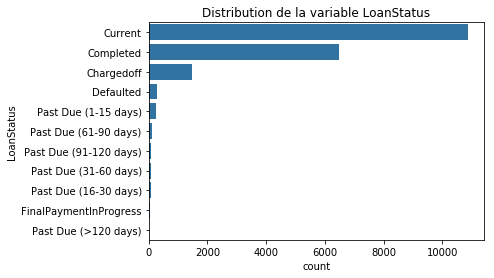

In [22]:
# Distribution de la variable LoanStatus
cat_plot('LoanStatus')

La majorité des emprunteurs (plus de 50,000) n'ont pas encore terminé le remboursement de leur prêt. Aussi, un nombre non négligeable (plus de 20,000) ont fini de rembourser leur prêt. Quelques individus malheuresement n'ont pas respecter leurs échéances. 

####  Quelle sont les cinq classement les plus fréquents?

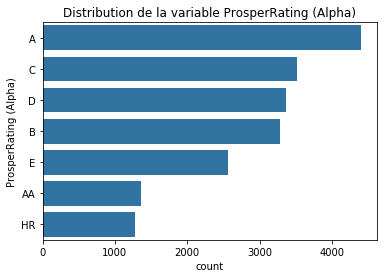

In [23]:
# Distribution de la variable ProsperRating (Alpha)
cat_plot('ProsperRating (Alpha)')

 On remarque que beaucoup emprunteurs ont été classé dans les catégories C,B, A  D et E la catégorie respectivement selon leurs effectifs. 

#### Quelle est la proportion des individus employés dans la population d'intérêt?

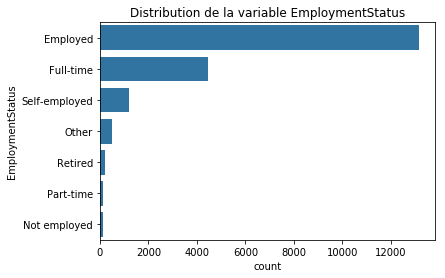

In [24]:
# Distribution de la variable EmploymentStatus
cat_plot('EmploymentStatus')

Por cette variable, intéressons-nous plutôt aux proportions des différentes modalités

In [25]:
# Insipéré par les codes fournies dans le cours 
effectifs=df_loans_clean['EmploymentStatus'].value_counts()
n_tot=df_loans_clean['EmploymentStatus'].value_counts().sum()
val_max=effectifs[0]
prop_max=val_max/n_tot

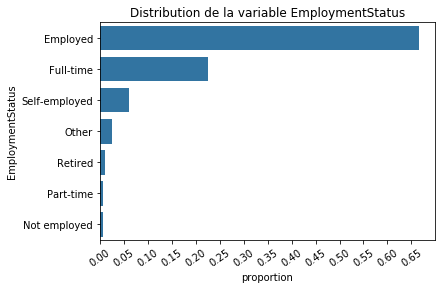

In [26]:
# Insipéré par les codes fournies dans le cours 
tick_props = np.arange(0, prop_max, 0.05) 
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
cat_plot('EmploymentStatus')
plt.xticks(tick_props*n_tot , tick_names)
plt.xticks(rotation=35)
plt.xlabel('proportion');

Près de 80% des emprunteurs sont des employés.

#### Quel est le motif principal qui conduit les individus à emprunter? 

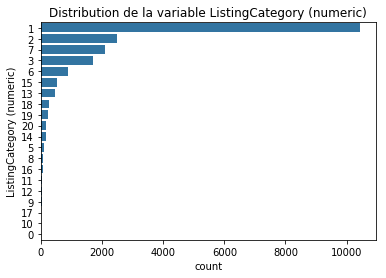

In [27]:
cat_plot('ListingCategory (numeric)')

La catégorie 1 est la plus fréquente, elle concerne les individus qui empruntent pour régler leurs dettes. 

#### Quels niveaux de revenus le plus parmi les demandeurs de prêt?. 

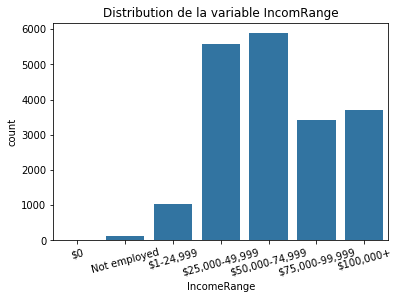

In [28]:
#Distribution des la variable IncomeRange
sb.countplot(data=df_loans_clean, x='IncomeRange', color=base_color)
plt.xticks(rotation=15)
plt.title('Distribution de la variable IncomRange');

On remarque que ceux qui ont des salaires compris entre $ $50,000  et $ $75,000(exclut), sont les plus nombreux. Cependant, cet effectif n'est pas trop éloigné de celui des emprunteurs ayant des revenues compris entre $ 25,000 et $ $ $50,000(exclut).  

In [29]:
df_loans_clean['Occupation'].unique()

[Executive, Professional, Laborer, Other, Clergy, ..., Student - Community College, Tradesman - Plumber, Student - College Freshman, Judge, Student - College Sophomore]
Length: 66
Categories (66, object): [Accountant/CPA < Administrative Assistant < Analyst < Architect ... Tradesman - Mechanic < Tradesman - Plumber < Truck Driver < Waiter/Waitress]

#### Quel type d'emploi demande plus de prêt?. 

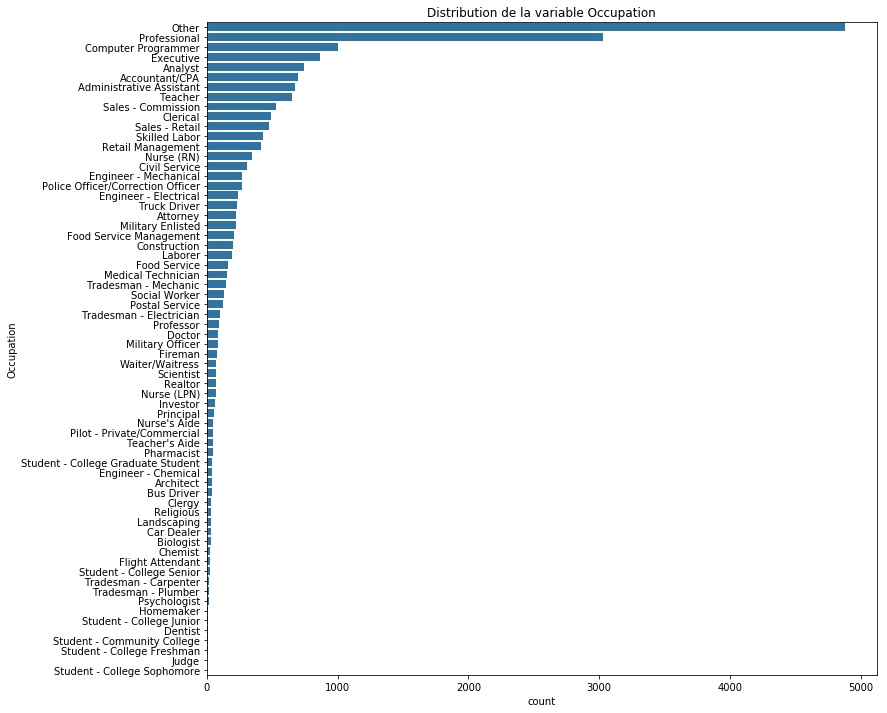

In [30]:
# Distribution de la variable Occupation 
plt.figure(figsize=[12,12])
cat_plot('Occupation')

Les modalités Other et Professional démeurent les plus fréquentes. 

+ **Variables numériques:**
 - **Discrètres:**
   - Term    
   - Recommendations
   - Investors  
   - LoanOriginalAmount
 - **Continues:**  
   - BorrowerAPR
   - BorrowerRate 
   - ProsperScore 
   - MonthlyLoanPayment 
   

#### Comment sont réparties les difirentes échéances des prêts?

In [31]:
# Distribution de la variable Term
df_loans_clean['Term'].unique()

array([36, 60, 12])

Les valeurs prises par cette variables sont trop éloignées les unes des autres, on va plutôt utiliser `countplot()` de seaborn à la olace de `hist()`

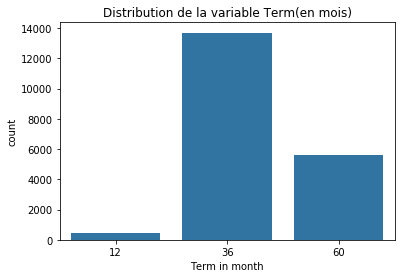

In [32]:
sb.countplot(data=df_loans_clean, x='Term', color=base_color)
plt.xlabel('Term in month')
plt.title('Distribution de la variable Term(en mois)');

La plus part des emprunteurs ont une échance de 36 mois soit 3ans. 

##### Comment les montants de prêts sont-ils distribués?

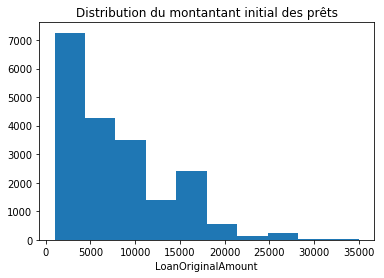

In [33]:
plt.hist(df_loans_clean['LoanOriginalAmount'])
plt.xlabel('LoanOriginalAmount')
plt.title('Distribution du montantant initial des prêts');

Nous observons une longue que de la variable `LoanOriginalAmount`. I serait peut-être intéressant d'observer la distribution du logharithme de cette variable.

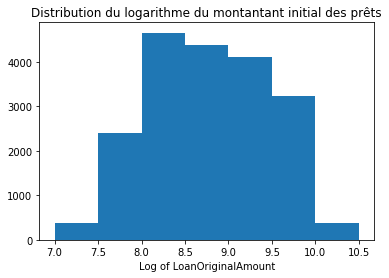

In [34]:
bins= np.arange(7,np.log(df_loans_clean['LoanOriginalAmount']).max()+0.5,0.5)
plt.hist(np.log(df_loans_clean['LoanOriginalAmount']), bins=bins)
plt.xlabel('Log of LoanOriginalAmount')
plt.title('Distribution du logarithme du montantant initial des prêts');

La transformation logarithmique réduit considérablement le poblème de valeurs abérrantes. Cependant, nous n'observons pas une distribution normale de cete nouvelle variable.

Nous maintenant explorer les variables continues. Nous le ferons grâce à leurs  l'histogrammes. Pour limiter les répétitions, nous allons créer une fonction pour le faire. 

In [35]:
def hist_plot(var, epsilon):
    bins= np.arange(0,df_loans_clean[var].max()+epsilon,epsilon)
    plt.hist(df_loans_clean[var], bins=bins)
    plt.xlabel(var)
    plt.title('Distribution de la variable' + ' '+ var);

##### Les taux d'intérêts annuels sont-ils distribués normalement?? 

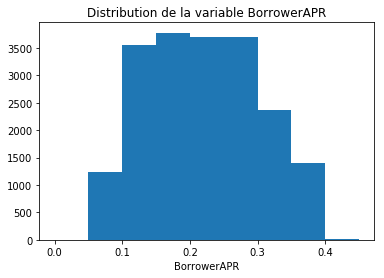

In [36]:
# Distribution de la variable 'BorrowerAPR'
hist_plot('BorrowerAPR', 0.05)

La distribution est légèrement étalée vers la droite. Elle tend à être normale 

##### Les taux d'intérêts sont-ils distribués normalement?? 

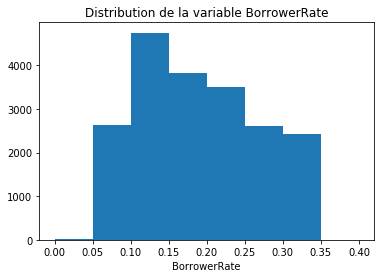

In [37]:
#Distribution de la variable BorrowerRate
hist_plot('BorrowerRate', 0.05)

Le taux d'intérêt quant à lui admet une distribution beaucoup plus à droite.

In [38]:
df_loans_clean['ProsperScore'].unique()

array([  4.,   8.,  10.,   5.,   6.,   3.,  11.,   2.,   9.,   7.,   1.])

#### Comment les scores des individus sont-ils distribués?

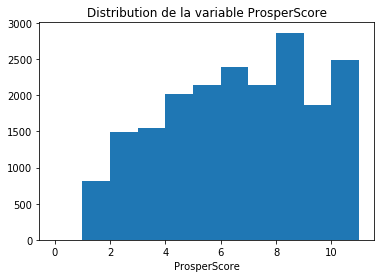

In [39]:
hist_plot('ProsperScore', 1)

Nous observons une distribution beaucoup plus étalée à gauche. Un bon nombre d'individus ont des scores moins élevés.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> La modélalité `Current` de la première variable d'intérêt(LoanStatus) démeure la plus fréquente(plus de 50,000). On observe une grande chutte entre cette modalité et la seconde la plus fréquente, `Completed` traduisant une différence significative entre les effectifs prises par les différentes modélaités de cette variable. 
Les taux annuels semblent être réparties normalement même si on observe un léger étalement vers la droite. Nous observons une situation similaire avec les taux d'intérêts. 
En ce qui concerne les montants initiaux des prêts, nous observons une longue queue avec un grand nombre de motants élevés. Avec une tranfsormation logarithmique, la distribution semble être normale.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> J'ai observé que la variable *'LoanOriginalAmount'* prenait beaucoup de valeurs élevées, traduisant une longue queue à droite de son histragramme. Pour mieux apprécier sa distribution, j'ai du effectuer une transformation logarithmique. Après transformation, nous observons une distribution qui tend à ressembler à celle d'une normale. 

## Bivariate Exploration

In [40]:
df_loans_clean.columns

Index(['ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerAPR',
       'LenderYield', 'BorrowerRate', 'ProsperRating (Alpha)', 'ProsperScore',
       'EmploymentStatus', 'Occupation', 'ListingCategory (numeric)',
       'MonthlyLoanPayment', 'IsBorrowerHomeowner', 'IncomeRange',
       'TotalProsperLoans', 'Recommendations', 'Investors',
       'LoanOriginalAmount'],
      dtype='object')

In [41]:
# Regroupement des variables en varibles numériques et catégorielles, dans deux listes
num_vars=['Term', 'BorrowerAPR','BorrowerRate', 'LenderYield', 'ProsperScore', 
          'MonthlyLoanPayment','TotalProsperLoans' ,'Recommendations','Investors', 
          'LoanOriginalAmount']

cat_vars=['LoanStatus', 'ProsperRating (Alpha)', 'EmploymentStatus',
          'IncomeRange', 'Occupation', 'ListingCategory (numeric)']

#### Quelles variables sont fortement corrélées entre elles?

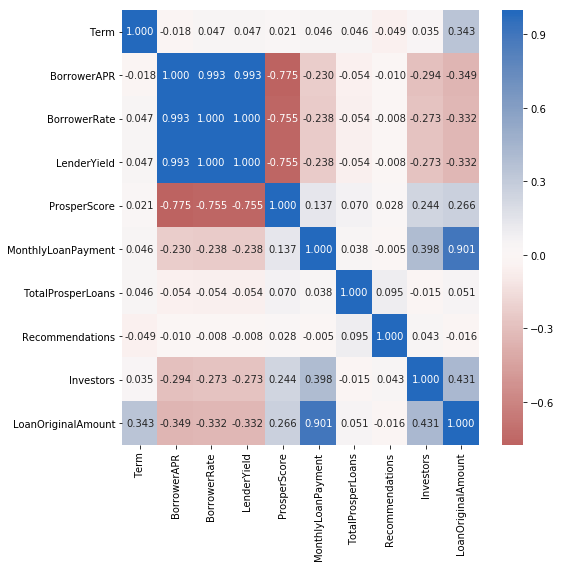

In [42]:
# Matrice de corrélation, pour les variables numériques. 
plt.figure(figsize = [8, 8])
sb.heatmap(df_loans_clean[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

#### Quelles variables sont fortement corrélées entre elles?

Afin de pouvoir effectuer rapidement les analyses et gagner en temps d'exécution, on va réaliser les nuages de points des variables numériques, en considérant un sous-ensemble sélectionner au hasard. 

In [43]:
# Nous souhaitons obtenir le même échantillon à chaque fois que nous exécutons le code.
import random
random.seed(10)
df_samp = df_loans_clean.sample(n=2000, replace = False)

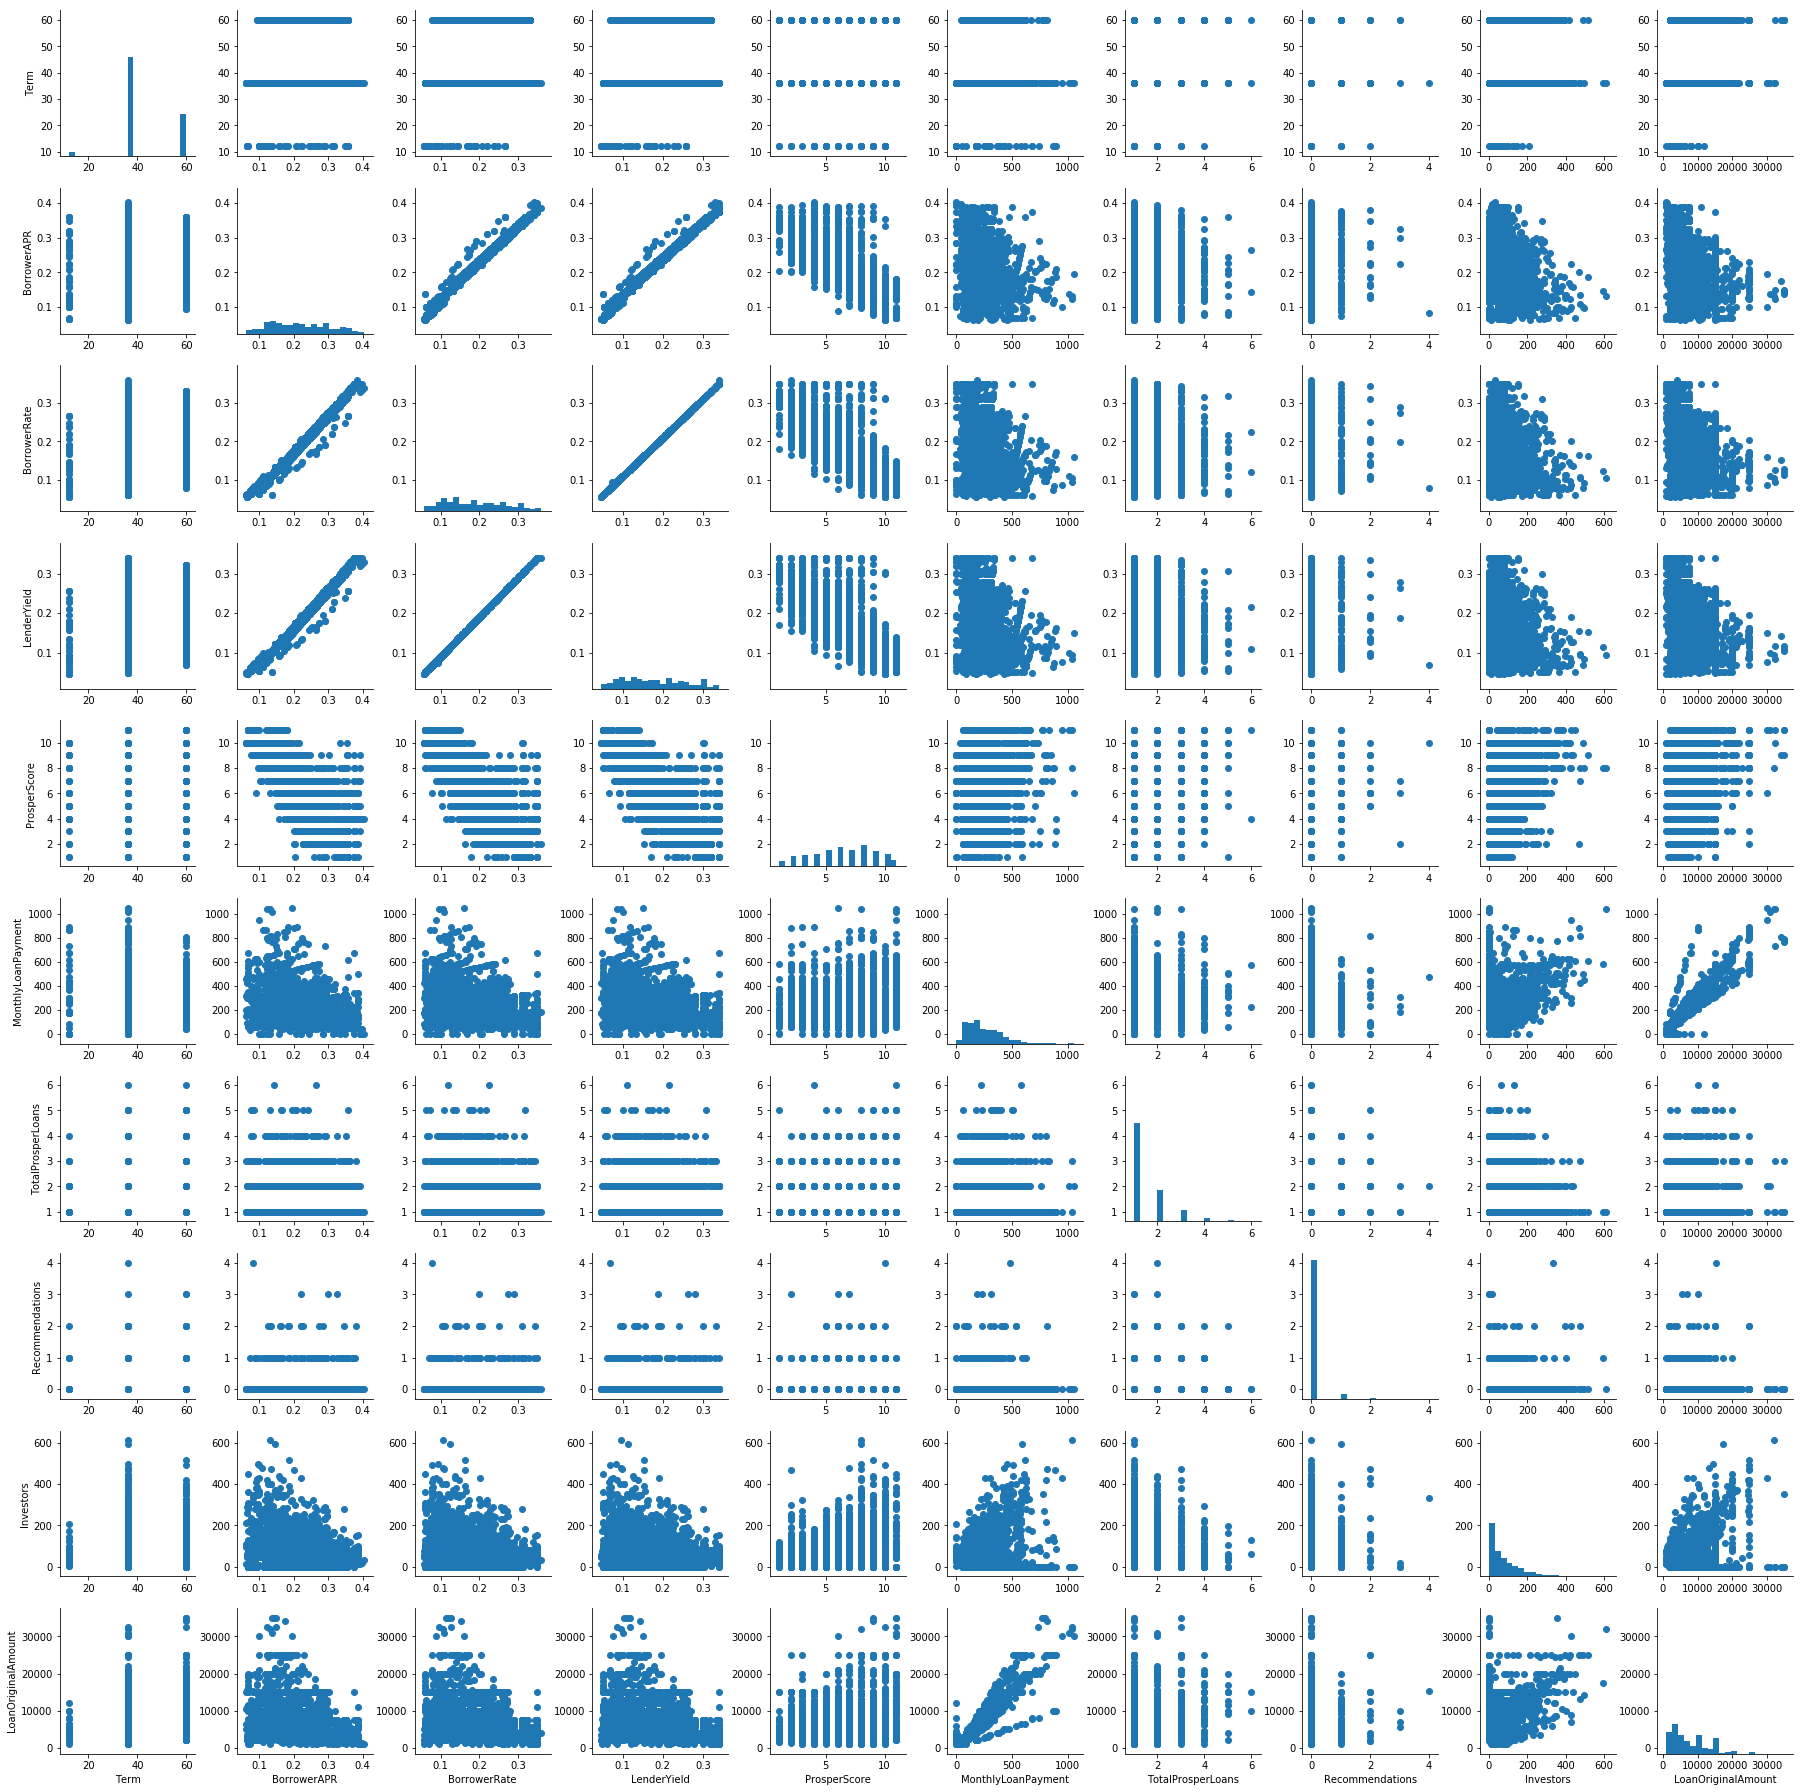

In [44]:
# Inspiré du Code du cours
g = sb.PairGrid(data = df_samp, vars = num_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter); 

On peut facilement remarqué qu'il existe une forte corrélation entre les variables `'BorrowerAPR', 'BorrowerRate et LenderYield'`,`MonthlyLoanPayment et 'LoanOriginalAmount'`. Il semble également exister une corélation entre les variables `'LoanOriginalAmount' et 'Investors.` Par contre, Les variables `'Term', 'Recommendations ` semblent n'être corrélées à aucune autre variable. 

Esssayons de visualiser la relation entre BorrowerAPR' et Prosperscore. Nous avons utiliser l'argument alpha de plt.scatter pour mieux faire apparaitre la relatio entre les deux variables.

#### Quelle est le dégré de corrélation linéaire entre BorrowerAPR' et ProsperScore?

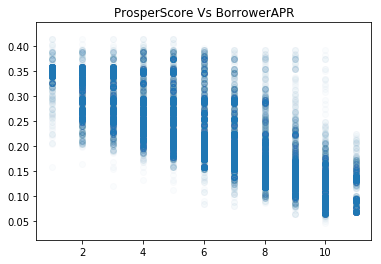

In [45]:
plt.scatter(data=df_loans_clean, x='ProsperScore', y='BorrowerAPR', alpha=0.02)
plt.title('ProsperScore Vs BorrowerAPR');

On remarque qu'il existe une corrélation négative entre les deux variables. En d'autres termes, les taux annuels des emprunteurs semblent être réduits au fur et à mesure que leurs score augmente.

Il serait intéressant d'explorer les différentes relations entre la variable `LoanStatus et les variables suivantes:ProsperRating (Alpha), EmploymentStatus,  IncomeRange`. Pour cela, nous utiliserons des diagrammes à barres groupés.

#### Les caractéristiques oanStatus et les variables suivantes:ProsperRating (Alpha), EmploymentStatus,  IncomeRange de l'emprunteur influencent-ils le statut de son prêt?

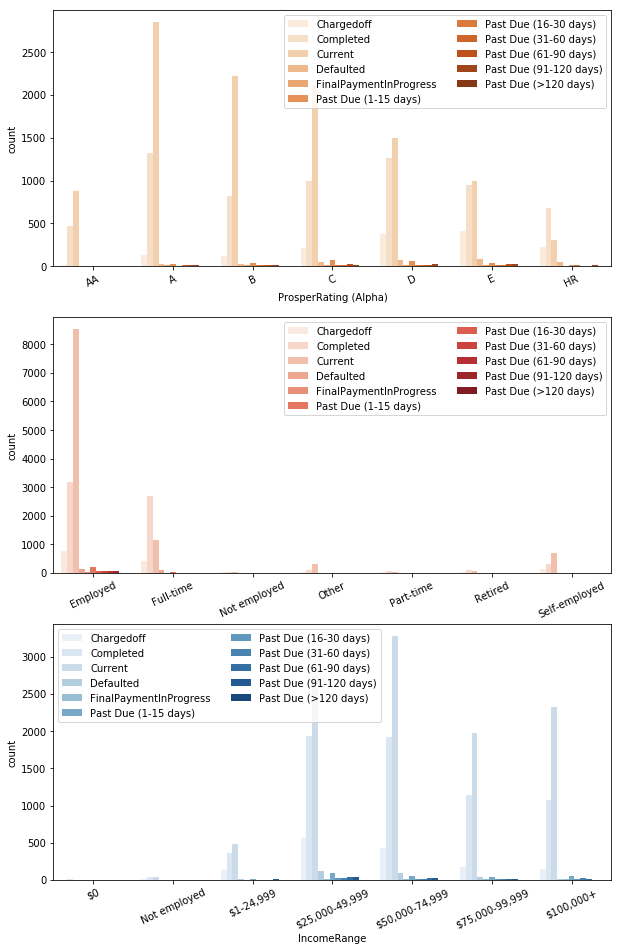

In [46]:
# Code inspiré par celui de Example_Project_Diamonds_Part1
plt.figure(figsize = [10, 16])

ax=plt.subplot(3, 1, 1)
sb.countplot(data = df_loans_clean, x = 'ProsperRating (Alpha)', hue ='LoanStatus' , palette = 'Oranges')
ax.legend(loc = 1, ncol = 2)
plt.xticks(rotation=25)

ax = plt.subplot(3, 1, 2)
sb.countplot(data = df_loans_clean, x ='EmploymentStatus', hue ='LoanStatus' , palette = 'Reds')
ax.legend(loc=1,ncol = 2) 
plt.xticks(rotation=25)

ax = plt.subplot(3, 1, 3)
sb.countplot(data =df_loans_clean, x ='IncomeRange' , hue = 'LoanStatus',palette = 'Blues')
ax.legend(loc = 2, ncol = 2)
plt.xticks(rotation=25)
plt.show()

Il semble ne pas exister une interaction entre le statut du prêt et le classement initial de l'individu. Pour l'esemble des modalités de la variable de classement, la modélité **Current** deumeure la plus fréquente, suivie de **Completed**, cela paraît être le cas pour les modalités de la variable `IncomeRange`. Par contre, on pourrait parler d'une interaction entre les variables `EmployementStatus et LoanStatus`. On remarque que les modalités **Employed, Full-time et self-employed** regroupe presque toutes les informations. Parmi les catégories Employed et self-employed, un individu a plus de chance de prendre la modalité **Current** tandis qu'il aura plus de chance d'appartenir à la catégorie **Completed**, s'il est dans la clsse  **Full-time**. Le revevenu semble inflencer les statuts des prêts en ce sens que plus le reveenu est élevé et plus les individus ont tendance à se retrouver dans les classes **Current** et **Completed**.

#### Existe t-il réellement une relation entre ``EmployementStatus et LoanStatus``?

In [47]:
heat_map=df_loans_clean.groupby(['EmploymentStatus', 'LoanStatus']).size()
heat_map=heat_map.reset_index(name='Count')
heat_map=heat_map.pivot(index = 'LoanStatus', columns ='EmploymentStatus' , values = 'Count') 

In [48]:
heat_map

EmploymentStatus,Employed,Full-time,Not employed,Other,Part-time,Retired,Self-employed
LoanStatus,,,,,,,
Chargedoff,787.0,438.0,20.0,45.0,23.0,26.0,127.0
Completed,3196.0,2692.0,42.0,92.0,68.0,101.0,303.0
Current,8520.0,1162.0,47.0,333.0,22.0,72.0,700.0
Defaulted,146.0,113.0,2.0,9.0,2.0,6.0,13.0
FinalPaymentInProgress,45.0,10.0,NaN,2.0,NaN,NaN,4.0
Past Due (1-15 days),197.0,23.0,1.0,9.0,2.0,2.0,13.0
Past Due (16-30 days),55.0,7.0,1.0,3.0,1.0,NaN,7.0
Past Due (31-60 days),64.0,12.0,NaN,2.0,2.0,1.0,5.0
Past Due (61-90 days),73.0,10.0,1.0,3.0,1.0,NaN,10.0


La présence des *NaN* n'est pas normale vu que la base à été nettoyer. Certainement que ces valeurs nuls ont du être introduites por remplacer les 0 dans les cellules correspondantes. Nous allons simplement changer les NaN par 0 puis produire notre heatmap. 

In [49]:
# Remplacer les NaN par 0
heat_map.fillna(0, inplace=True)

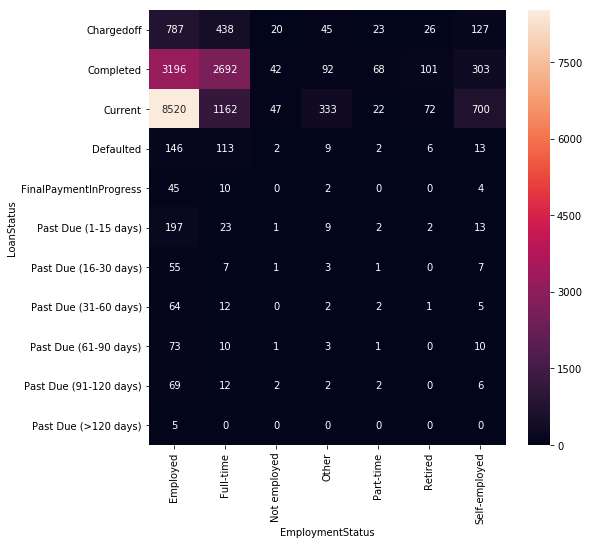

In [50]:
# Réalisation du heatmap
plt.figure(figsize = [8, 8])
sb.heatmap(data=heat_map, annot=True, fmt='.0f');

#### Quelle est la répartition de la variable ``LoanStatus`` entre les demandeurs de prêts détenteurs de maison et les non détenteurs?*

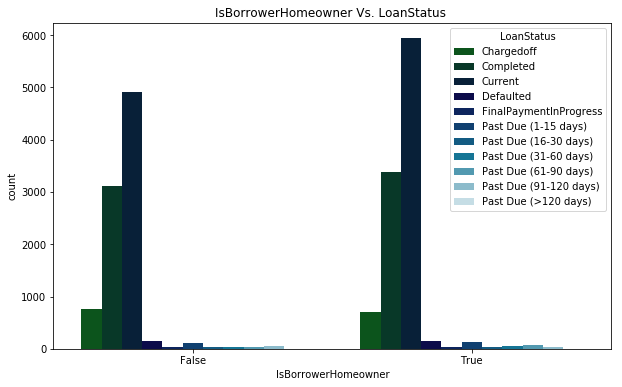

In [51]:
plt.figure(figsize=[10,6])
sb.countplot(data =df_loans_clean, x ='IsBorrowerHomeowner' , hue = 'LoanStatus',palette = 'ocean')
plt.title('IsBorrowerHomeowner Vs. LoanStatus '); 

Le fait de posséder une maison ou pas semble ne pas affecter le statut du prêt. 

Pour finir la partie de l'exploration bivariée, analysons quelques relations entre variables quantitatives et variables qualitatives. Puisque nos variables  d'intérêts sont `LoanStatus et BorrowerAPR`, qualitative et quantitative respectivement, nous allons d'une part visualiser ``LoanStatus vs variable quantitative``, puis  `` BorrowerAPR vs variable qualitative`` d'autre part. 

#### Comment les scores et les montants initiaux des prêts affectent-ils le statut du prêt? 

In [52]:
# Création de la liste des variables numériques prises en compte pour
# analyser leurs relations avec LoanStatus.  
num_feat_vars=['ProsperScore', 'LoanOriginalAmount']

Nous allons réaliser des boxplots pour étudier les relations. 

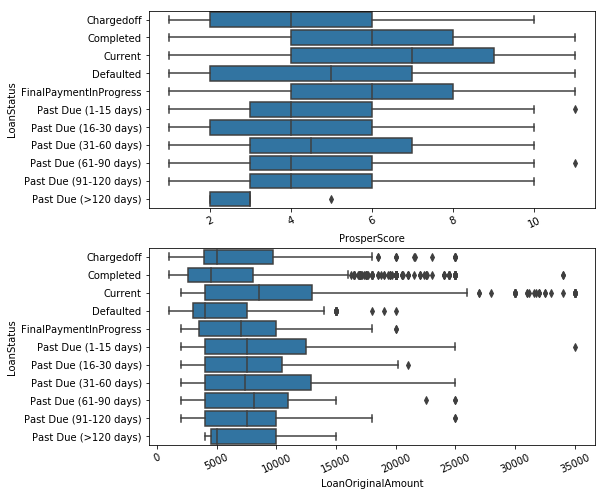

In [53]:
plt.figure(figsize = [8, 8])

ax = plt.subplot(2, 1, 1)
sb.boxplot(data = df_loans_clean, x ='ProsperScore', y ='LoanStatus' , color=base_color) 
plt.xticks(rotation=25)

ax = plt.subplot(2, 1, 2)
sb.boxplot(data =df_loans_clean, x ='LoanOriginalAmount' , y = 'LoanStatus',color=base_color)
plt.xticks(rotation=25)
plt.show()



La variable *ProsperScore* semble expliquer la variable LoanStatus. En effet, on remarque que les individus ayant un score supérieur  appartiennant aux deux classes les plus représentées ( *Current et completed*) et à la classe *FinalPaymentInProgress* semblent prendre les scores les plus élevés, avec des scores médians supérieurs à 6. 

Pour la seconde variable, on remarque de légers différences. On note là, la présence de beaucoup de valeurs abérrantes. La modalité **Current** a la plus grande médiane tandis que **Defaulted** a la plus faible. 

In [54]:
 #Création de la liste des variables qualitatives prises en compte pour
# analyser leurs relations avec BorrowerAPR.  
cat_feat_var=['ProsperRating (Alpha)','ListingCategory (numeric)', 'EmploymentStatus', 'IncomeRange']

#### Les variables catégorielles suivantes :'ProsperRating(Alpha)','ListingCategory (numeric)', 'EmploymentStatus', 'IncomeRange' ont-elles une influence sur les taux d'intérêts ? 

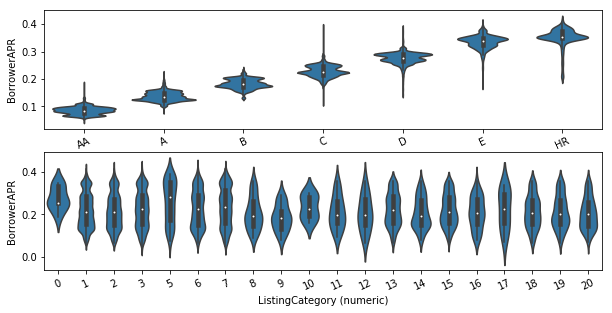

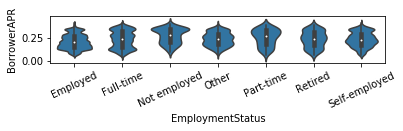

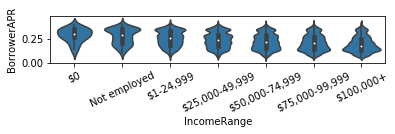

In [55]:
plt.figure(figsize = [10, 10])

ax = plt.subplot(4, 1, 1)
sb.violinplot(data = df_loans_clean, x ='ProsperRating (Alpha)', y ='BorrowerAPR' , color=base_color) 
plt.xticks(rotation=25)

ax = plt.subplot(4, 1, 2)
sb.violinplot(data =df_loans_clean, x ='ListingCategory (numeric)' , y = 'BorrowerAPR',color=base_color)
plt.xticks(rotation=25)
plt.show()

ax = plt.subplot(4, 1, 3)
sb.violinplot(data =df_loans_clean, x ='EmploymentStatus' , y = 'BorrowerAPR',color=base_color)
plt.xticks(rotation=25)
plt.show()

ax = plt.subplot(4, 1, 4)
sb.violinplot(data =df_loans_clean, x ='IncomeRange' , y = 'BorrowerAPR',color=base_color)
plt.xticks(rotation=25)
plt.show()

On remarque sans difficuté que BorrowerAPR augmente quand le ProsperRating (Alpha) varie de la classe inférieure AA, à la classe supérieure.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> J'ai remarqué une forte corrélation positive entre les variables BorrowerAPR et BorrowerRate.Le taux d'intérêt de l'emprunteur augmente avec son taux annuel, ce qui n'est pas surprenant. Aussi, j'ai détecter une relation négative entre BorrowerAPR et ProsperScore, ce qui traduirait que les taux annuels diminuent au fur et à mesure que le score augmente. 
En ce qui concerne le statut du prêt, j'ai identifié que cette variable est influencée par la situation professionnel du postulant, de son revenu, le montant initial du prêt. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> On observe une corrélation linéaire assez forte entre le motant initial du prêt et le motant mensuel à payer. 

## Multivariate Exploration

Visualisons la distribution des taux annuels en fonction du score en plus d'une variable catégorielle. Les variables catégorielles considérées sont `IncomeRange` et `ProsperRating (Alpha)`. Le code étant similaire, j'ai eu recours à une fonction pour limiter les répétions. 

In [56]:
# Code inspiré par celui de Example_Project_Diamonds_Part1
def facet_plot(var, ncol):
    g = sb.FacetGrid(data = df_loans_clean, col = var, col_wrap = ncol, size = 3)
    g.map(plt.scatter, 'ProsperScore', 'BorrowerAPR')
    g.set_xlabels('Score')
    plt.show()

#### Observons-nous la même relation entre BorrowerAPR et ProsperScore au sein des différents niveau de revenus?

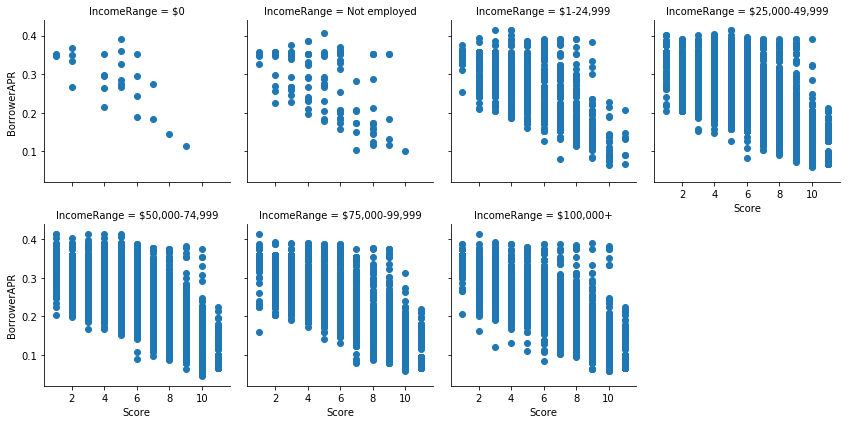

In [57]:
plt.figure(figsize=[12,12]);
facet_plot('IncomeRange', 4)

On remaque que quelque soit la classe de revenu, la semble exister une relation linéaire négative entre les varibles BorrowerRate et ProsperScore, même si cela n'est pas assez évident pour les deux premières classes.  

#### Observons-nous la même relation entre BorrowerAPR et ProsperScore au sein des différents niveau de classement?

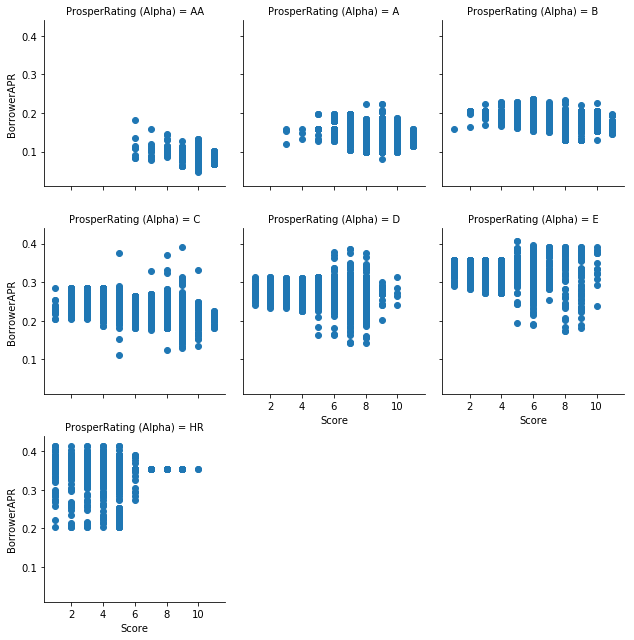

In [58]:
plt.figure(figsize=[12,12]);
facet_plot('ProsperRating (Alpha)',3)

On remarque que la distribution au sein de chaque catégorie est différente. La corrélation négative sembe  entre les deux variables BorrowerAPR ProsperScore et assez évidente au sein de la catégorie **AA**, cela n'est pas vraiment le cas pour les autres. Pour la catégorie **HR**, par exemple, il est vraimenet difficile de parler d'une corrélation. Les taux fixés dans cette classe sont généralement élevés quelque soit le score attribué. 

##### Être propriétaire d'une maison et le statut profesionnel influencent-ils le taux d'intérêt?

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


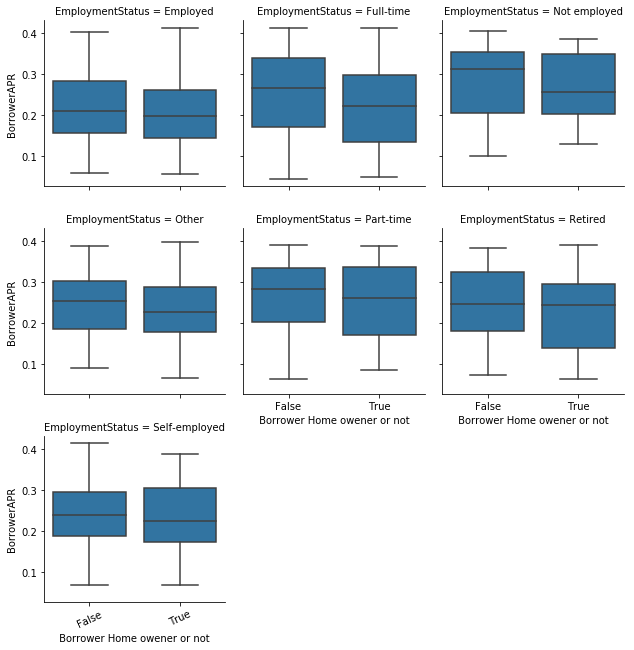

In [59]:
# Code inspiré par celui de Example_Project_Diamonds_Part1
g = sb.FacetGrid(data = df_loans_clean, col = 'EmploymentStatus', col_wrap = 3, size = 3)
g.map(sb.boxplot, 'IsBorrowerHomeowner', 'BorrowerAPR')
g.set_xlabels(' Borrower Home owener or not ')
plt.xticks(rotation=25)
plt.show()

Dans l'ensemble, les individus disposant d'une maison semblent avoir des taux annuels moins élevés que ceux qui n'en ont pas, quelque soit le type d'emploi.  

#### Comment est distribué de la situation des prêts en fonction des motants initiaux, en tenant compte du fait que l'emprunteur dispose ou pas d'une maison?

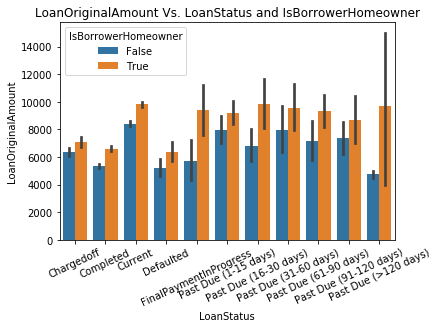

In [60]:
# Réalisation d'un barplot en ajoutant une troisième variable
sb.barplot(data = df_loans_clean, x = 'LoanStatus', y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner')
plt.title('LoanOriginalAmount Vs. LoanStatus and IsBorrowerHomeowner')
plt.xticks(rotation=25);

Les proprétaires de maisons ont tendances à contracter de gros prêts contrairement à ceux qui n'en ont pas. Il n'est pas assez surprenant de remarquer que ces individus sont les plus nombreux parmi ceux qui n'ont pas respercter leurs échéances. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Grâce à la visualisation multivariée, on peut facilement remarquer que les individus de la classe **Not Emplyed** et ne possédant pas de maison sont ceux qui ont les taux les plus élévés, cela pourrait s'expliquer par le fait que ces individus sient considérés comme étant à risque. On remarque également les proprétaires de maisons ont tendances à contracter de gros prêts contrairement à ceux qui n'en ont pas. Il n'est pas assez surprenant de remarquer que ces individus sont les plus nombreux parmi ceux qui n'ont pas respercter leurs échéances. En présence de la  variable `IsBorrowerHomeowner`, on détecte facilement qu'il y a une intéraction entre le montant initial du prêt et le Statut du prêt.

### Were there any interesting or surprising interactions between features?
> C'est très intéressant de remarquer que les taux d'intérêts soient liés au fait que les individus possèdent ou pas des maisons.  Aussi, j'ai été surpris que malgré que j'ai identifié une forte corrélation négative entre les variables ProsperScore et BorrowerAPR, la présence d'une troisième variable cattégorielle mette en exergue des disparités au sein des catégories.   


## Conclusions
>Les différentes types d'analyses à savoir, univariées, bivariées et multivariées nous ont permis des résultats assez pertinents. Les individus dont le remboursement du prêt est toujours en cours démeurent les plus nombreux. Aussi, nous avons remarqué que les taux d'intérêts ne dépassent pas les 40%.   Certaines caractéristiques des demandeurs de prêts affectent le satut du remboursement de leurs prêts, il s'agit par exemple du statut profession de l'emprunteur ou encore du niveau de son revenu. Les taux annuels quant à eux augmentent selon le classement de AA à HR. 
Cependant, il faut noter que nos analyses ainsi que les résultats qui en découlent pourraient être très limiter parce nous n'avons pas considéré toutes les caractéristiques des individus.

### Références
1- Cours Udacity

2- Example_Project_Diamonds_Part1

3- Example_Project_Diamonds_Part2

4- ProsperLoanDataExploration: kaggle